#Hinge line elements

Using Bayesian Gaussian process latent variable model with back constraints to discover different segments in the scanned hinge.

Made by Ivan De Boi (ivan.deboi at uantwerpen.be, http://www.InViLab.be).

In [1]:
shape_name_string = 'Hinge noisy'

# Imports

In [2]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

import warnings
warnings.filterwarnings('ignore')

from matplotlib import cm

!pip install GPy
import GPy
from GPy.util import pca
from GPy import kern
GPy.plotting.change_plotting_library('matplotlib')
from GPy import mappings

from sklearn.preprocessing import StandardScaler

import plotly.graph_objects as go

from numpy import genfromtxt

from google.colab import drive
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 959 kB 13.7 MB/s 
     |████████████████████████████████| 71 kB 9.6 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565138 sha256=f63237d81bd8a94bd6b22a1f0e1e3b7bc8f14062dddba335adc10ee585d77cc5
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=af11c5f023e780851dbe6236436174aff71ab5a5d2864f5724a6111df9b710f6
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [3]:
#use this to adjust the resolution of the pictures etc.
#print(plt.rcParams)  # it will tell you all default setting in Matplotlib
print(plt.rcParams.get('figure.figsize'))
plt.rcParams['figure.figsize'] = [8,6]
print(plt.rcParams.get('figure.figsize'))

print(plt.rcParams.get('figure.dpi'))
plt.rcParams['figure.dpi'] = 72.0*3
print(plt.rcParams.get('figure.dpi'))

print(plt.rcParams.get('image.cmap'))
plt.rcParams['image.cmap'] = 'rainbow'
print(plt.rcParams.get('image.cmap'))

[6.0, 4.0]
[8.0, 6.0]
72.0
216.0
viridis
rainbow


# Data

In [4]:
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/PhD 3D Sensing/05 GPLVM on set of lines/Line Elements Surface/Line Elements/'  #change dir to your project folder

Mounted at /content/gdrive


In [5]:
data = genfromtxt(root_path + shape_name_string + ' line elements.csv', delimiter=',')
shape_name_string
Y = data[:,:]
print(Y[0:3,:])
print(Y.shape)

[[ 0.43441325 -0.89115483 -0.13087495  0.85130966  0.47313541 -0.39592522
  -0.03097427]
 [ 0.49835855 -0.7820695   0.37417394  0.80275536  0.33670813 -0.36542049
   0.49651733]
 [ 0.19212832 -0.83868957  0.50959444  0.86796403 -0.00758526 -0.33972535
   0.50608236]]
(21658, 7)


# PCA

In [6]:
# Normalize
scaler = StandardScaler()
scaler.fit(Y)

Yn = scaler.transform(Y)
print(Yn[0:3, :])

# Sanity checks
print("mean y:",Y.mean())
print("std y:", Y.std())
print("mean yn:", Yn.mean())
print("std yn:", Yn.std())

[[ 1.32473687 -2.09629938 -0.75837175  2.01083341  1.67026081 -0.05546017
  -0.71591608]
 [ 1.42345897 -1.86038069  0.53098058  1.91186797  1.32395152 -0.00977374
   0.34205364]
 [ 0.95068467 -1.98283283  0.87669908  2.04477905  0.44999144  0.02870945
   0.36123785]]
mean y: -0.07605042894237864
std y: 0.5778473308051348
mean yn: 9.748485484618079e-18
std yn: 0.9999999999999987


In [7]:
points = np.zeros((Y.shape[0], 3))
for i in range(Y.shape[0]):
  p = np.cross(Y[i,0:3], Y[i,3:6]) + Y[i,6]*Y[i,0:3]
  points[i,:] = p

print(points)
print(points.shape)

labels = points[:,2]*0
labels[np.where(points[:,0] > 0.05)] = 0.333 #cone
labels[np.where(points[:,2] > 0.8)] = 0 #corr
labels[np.where(points[:,1] > 0.05)] = 0.666 #cyl
labels[np.where(points[:,2] > 0.97)] = 1 #top

print(labels)
print(labels.shape)

fig = go.Figure(data=[go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2],
                                   mode='markers',
                                   marker=dict(size=3, color = labels, colorscale='Rainbow',opacity=0.8)
                                   )])
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=4
    ),
)
fig.show( )

[[0.40129661 0.08818293 0.96823876]
 [0.40724047 0.0941695  0.9813957 ]
 [0.38602226 0.08313451 0.98439179]
 ...
 [0.0939627  0.84293755 0.74116109]
 [0.11912234 0.84571993 0.68579183]
 [0.10933177 0.84694219 0.70591642]]
(21658, 3)
[0.666 1.    1.    ... 0.666 0.666 0.666]
(21658,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

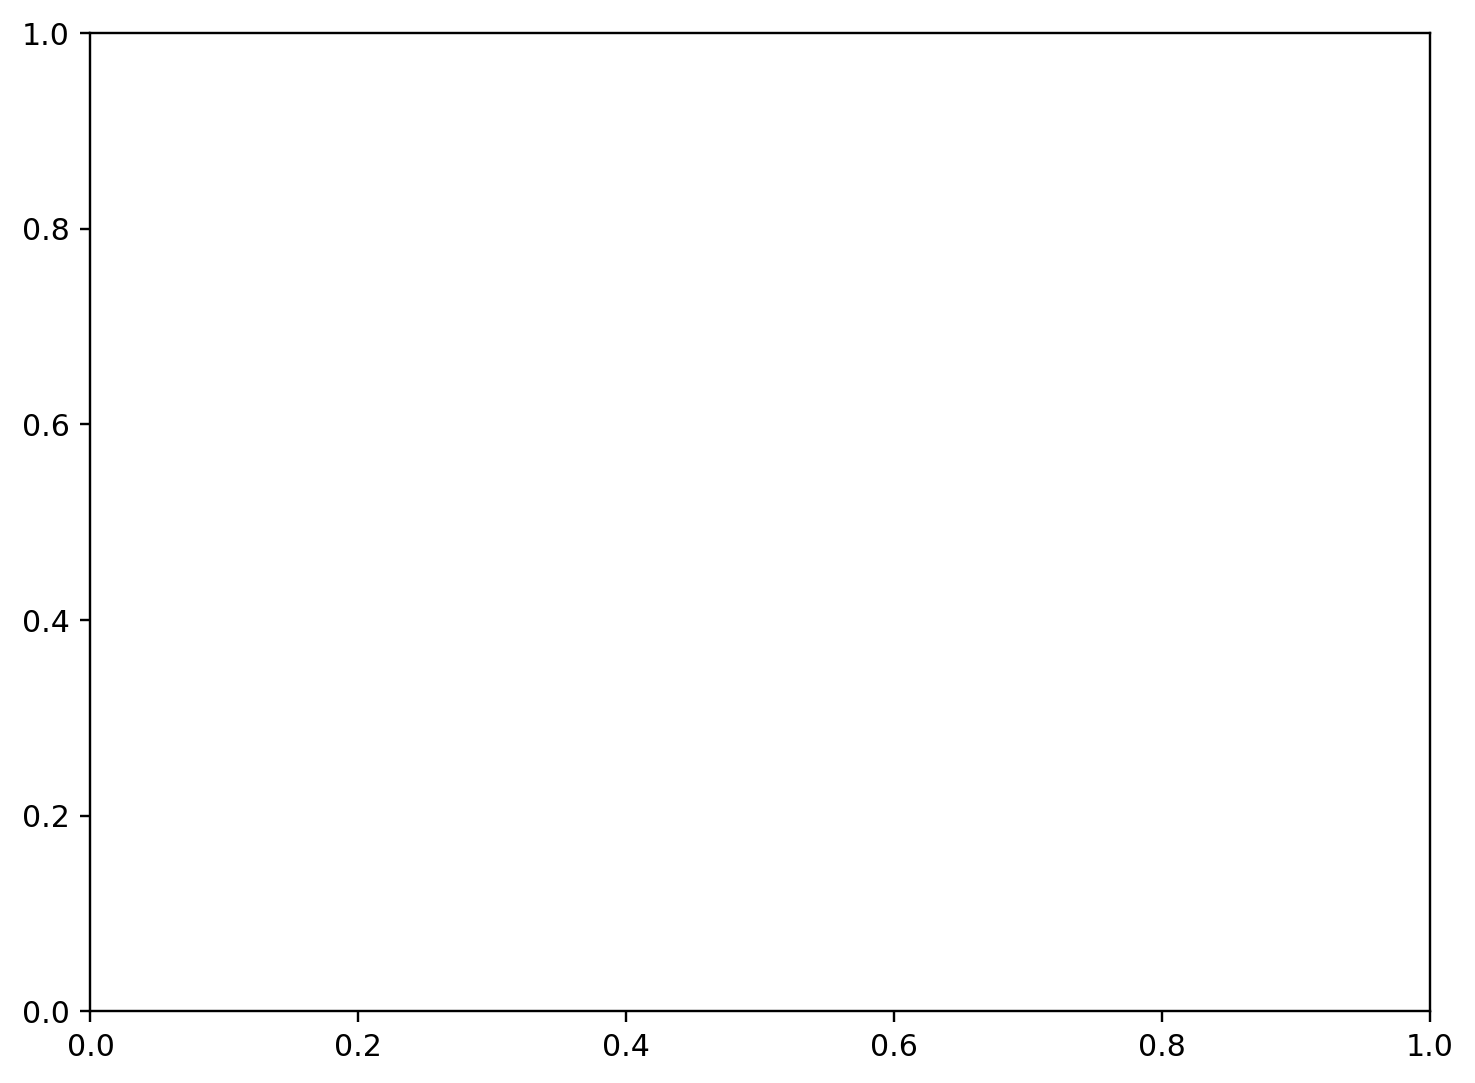

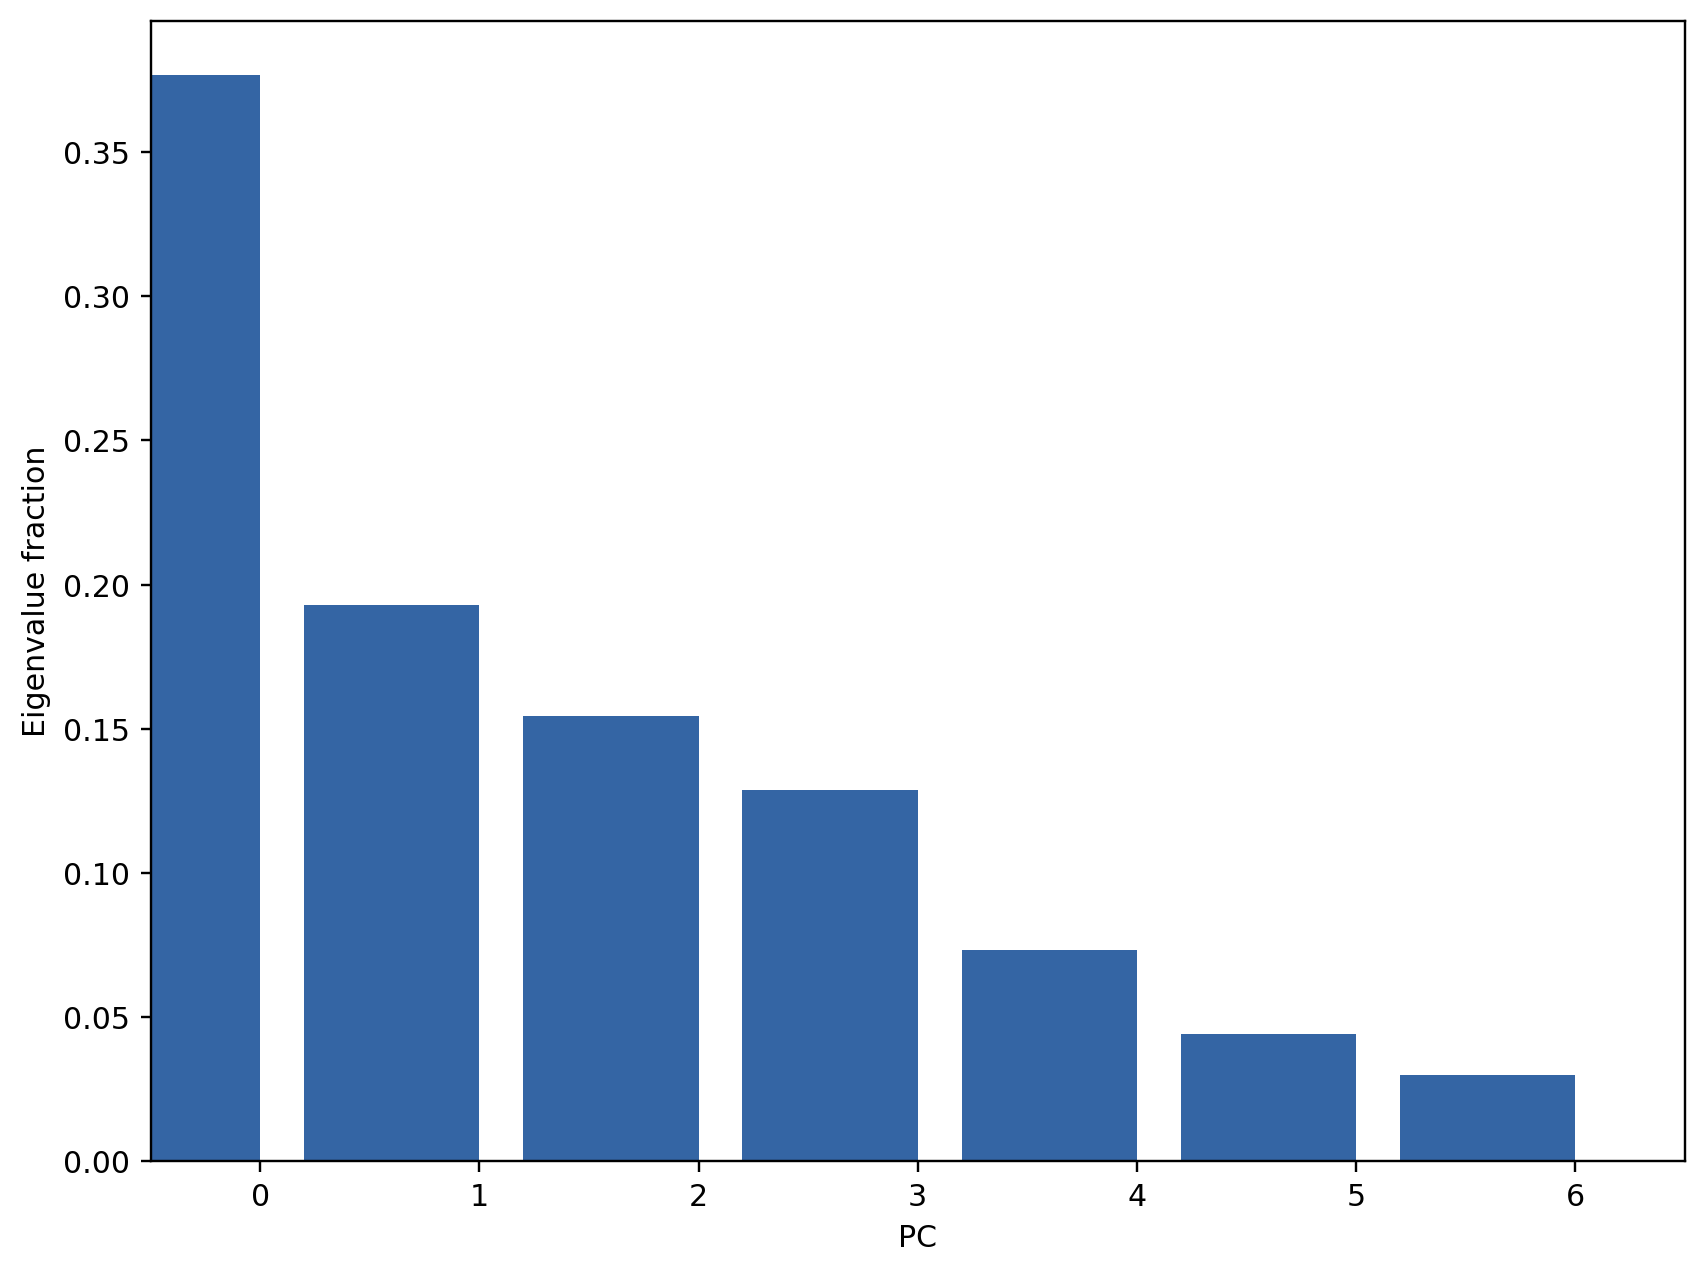

In [8]:
p = pca.PCA(Yn)
# plot first xxx eigenvalue fractions

fig, ax = plt.subplots()
p.plot_fracs(Yn.shape[1]) 

filename = shape_name_string + ' PCA.png'
plt.savefig(filename)
files.download('/content/' + filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

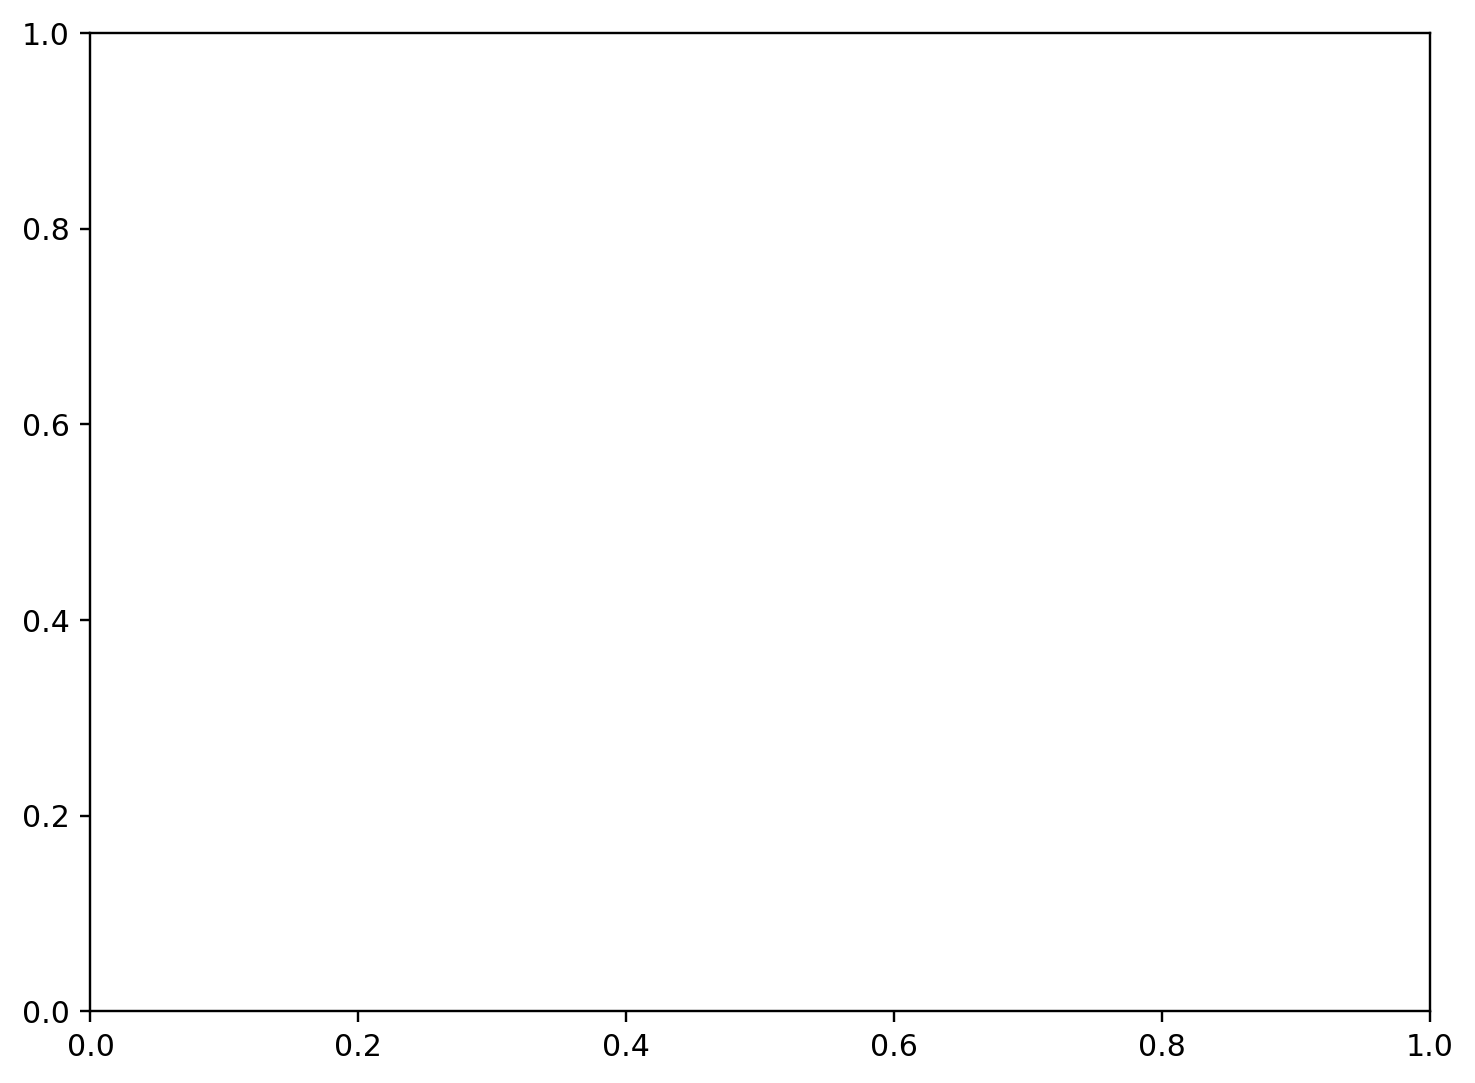

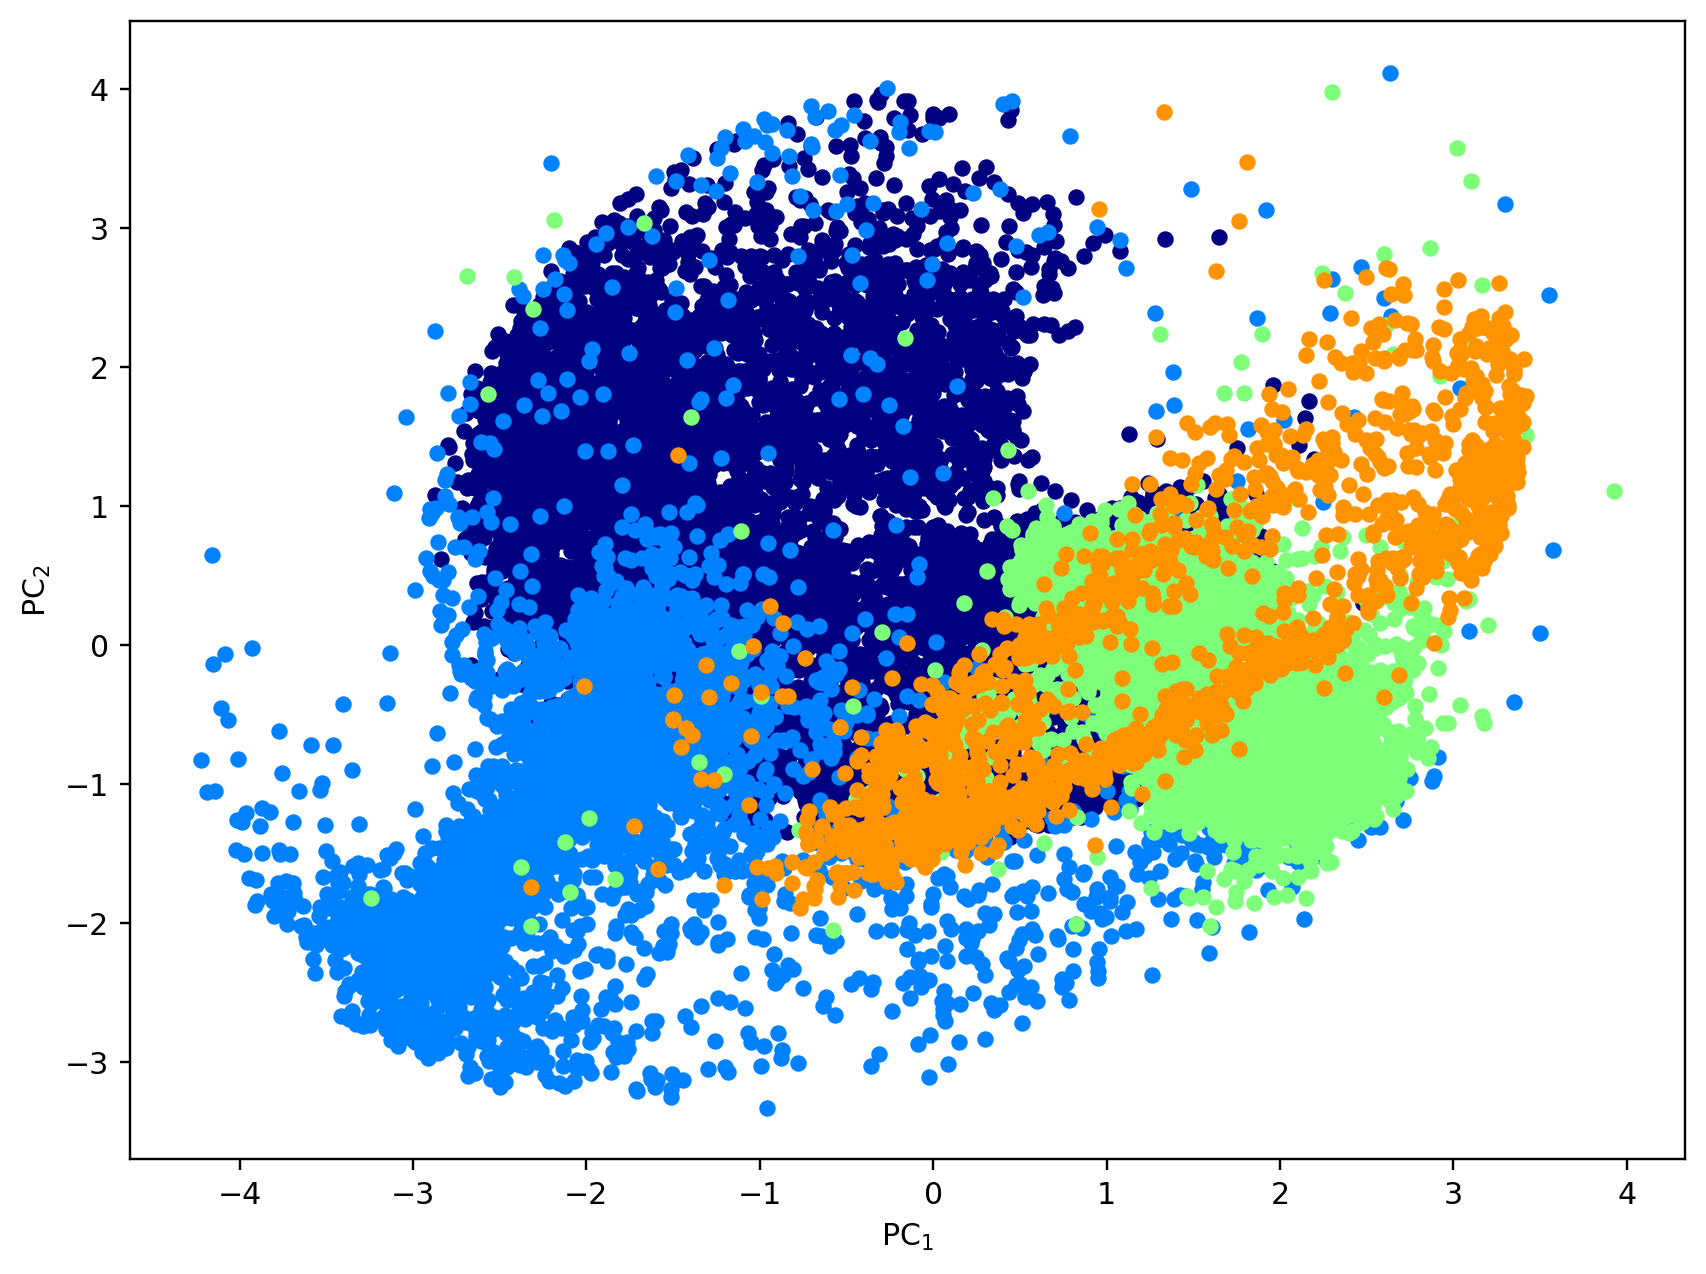

In [9]:
# plot the latent space by PCA

fig, ax = plt.subplots()
p.plot_2d(Yn, labels = labels)

filename = shape_name_string + ' 2D PCA.png'
plt.savefig(filename)
files.download('/content/' + filename)

# BGPLVM

In [10]:
print(Y[0:3,:])

[[ 0.43441325 -0.89115483 -0.13087495  0.85130966  0.47313541 -0.39592522
  -0.03097427]
 [ 0.49835855 -0.7820695   0.37417394  0.80275536  0.33670813 -0.36542049
   0.49651733]
 [ 0.19212832 -0.83868957  0.50959444  0.86796403 -0.00758526 -0.33972535
   0.50608236]]


In [11]:
max_nr_of_data_points = 5000 #use this line to subsample
#max_nr_of_data_points = Y.shape[0]
Y = Y[np.random.choice(Y.shape[0], max_nr_of_data_points, replace=False), :] #permutation on the datapoints
print(Y[0:3,:])


[[ 0.67400116  0.73847735 -0.0193305  -0.50793827  0.45911086 -0.17112863
   0.84305036]
 [-0.61524618  0.78242821  0.09632307 -0.23543414 -0.23720317  0.4229984
   0.67560047]
 [-0.99826747  0.05875813  0.00306731 -0.05117631 -0.85251153 -0.32460362
  -0.05774013]]


(5000, 3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

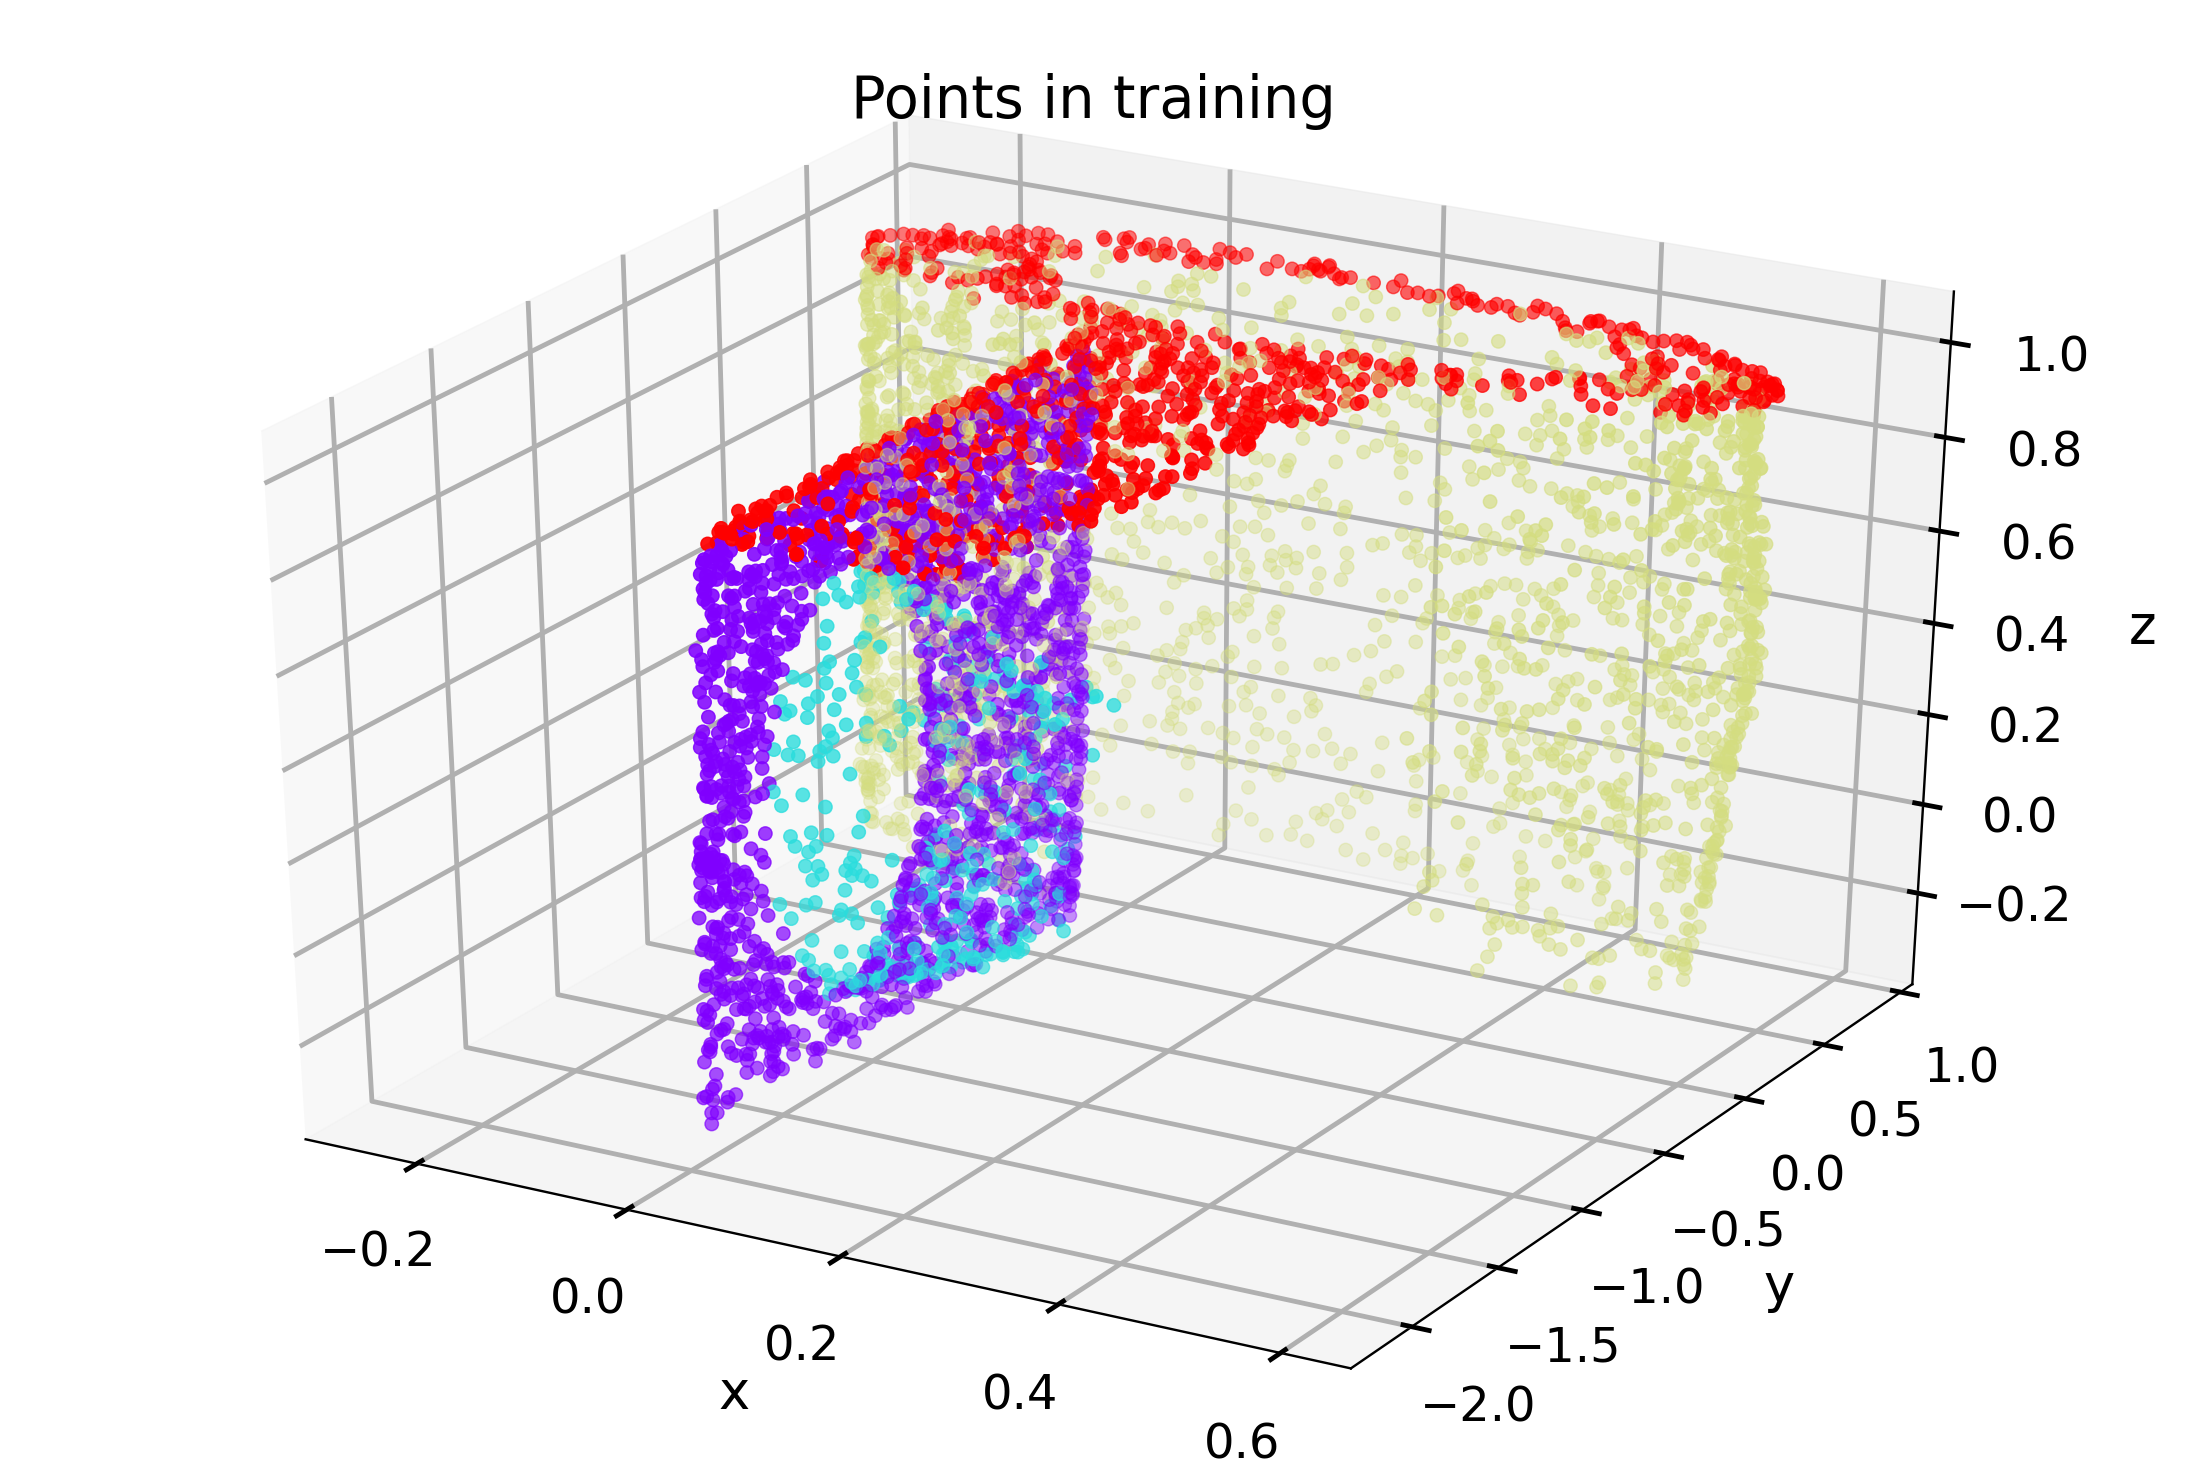

In [12]:
points = np.zeros((Y.shape[0], 3))
for i in range(Y.shape[0]):
  p = np.cross(Y[i,0:3], Y[i,3:6]) + Y[i,6]*Y[i,0:3] #calculate the points from the line elements
  points[i,:] = p
print(points.shape)

labels = points[:,2]*0
labels[np.where(points[:,0] > 0.05)] = 0.333 #cone
labels[np.where(points[:,2] > 0.8)] = 0 #corr
labels[np.where(points[:,1] > 0.05)] = 0.666 #cyl
labels[np.where(points[:,2] > 0.97)] = 1 #top

plt.style.use('seaborn-poster')
ax = plt.axes(projection='3d')

ax.scatter3D(points[:, 0], points[:,1], points[:, 2], c = labels)
ax.set_title('Points in training')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

filename = shape_name_string + ' points in training.png'
plt.savefig(filename)
files.download('/content/' + filename)

plt.show(ax)

In [13]:
#use this to create an interactive 3D plot, use mouse buttons to translate, rotate and zoom
fig = go.Figure(data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:, 2],
                                   mode='markers',
                                   marker=dict(size=3, color = labels, colorscale='Rainbow',opacity=1.0)
                                   )])
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=4
    ),
)
fig.show( )

In [14]:
max_nr_of_iters = 25000

init='PCA'
#init='random'

likelihood_variance = 1e-6
likelihood_variance_fix = False 

optimizer = 'scg'
optimizer = 'lbfgs'
#optimizer = 'tnc'

num_restarts = 3

input_dim = 7 #Y.shape[1]
num_inducing= 50

In [16]:
k_GPLVM = GPy.kern.RBF(input_dim, ARD = True)

m_GPLVM = GPy.models.BayesianGPLVM(Y, input_dim, kernel=k_GPLVM, init=init, num_inducing=num_inducing)

m_GPLVM.rbf.variance = 0.01
m_GPLVM.Gaussian_noise.variance = 0.001

if likelihood_variance_fix:
  m_GPLVM.likelihood.variance = likelihood_variance
  m_GPLVM.likelihood.variance.fix()

m_GPLVM.optimize_restarts(messages=1, num_restarts=num_restarts, max_iters=max_nr_of_iters, optimizer = optimizer)
print(m_GPLVM)  

Optimization restart 1/3, f = -11937.978375174032


Optimization restart 2/3, f = 30905.550351440193


Optimization restart 3/3, f = 30905.586766285152

Name : bayesian gplvm
Objective : -11937.978375174032
Number of Parameters : 70359
Number of Optimization Parameters : 70359
Updates : True
Parameters:
  bayesian_gplvm.          |                  value  |  constraints  |  priors
  latent_space.mean        |              (5000, 7)  |               |        
  latent_space.variance    |              (5000, 7)  |      +ve      |        
  inducing_inputs          |                (50, 7)  |               |        
  rbf.variance             |     0.1503916922546947  |      +ve      |        
  rbf.lengthscale          |                   (7,)  |      +ve      |        
  Gaussian_noise.variance  |  0.0002450085070396798  |      +ve      |        


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

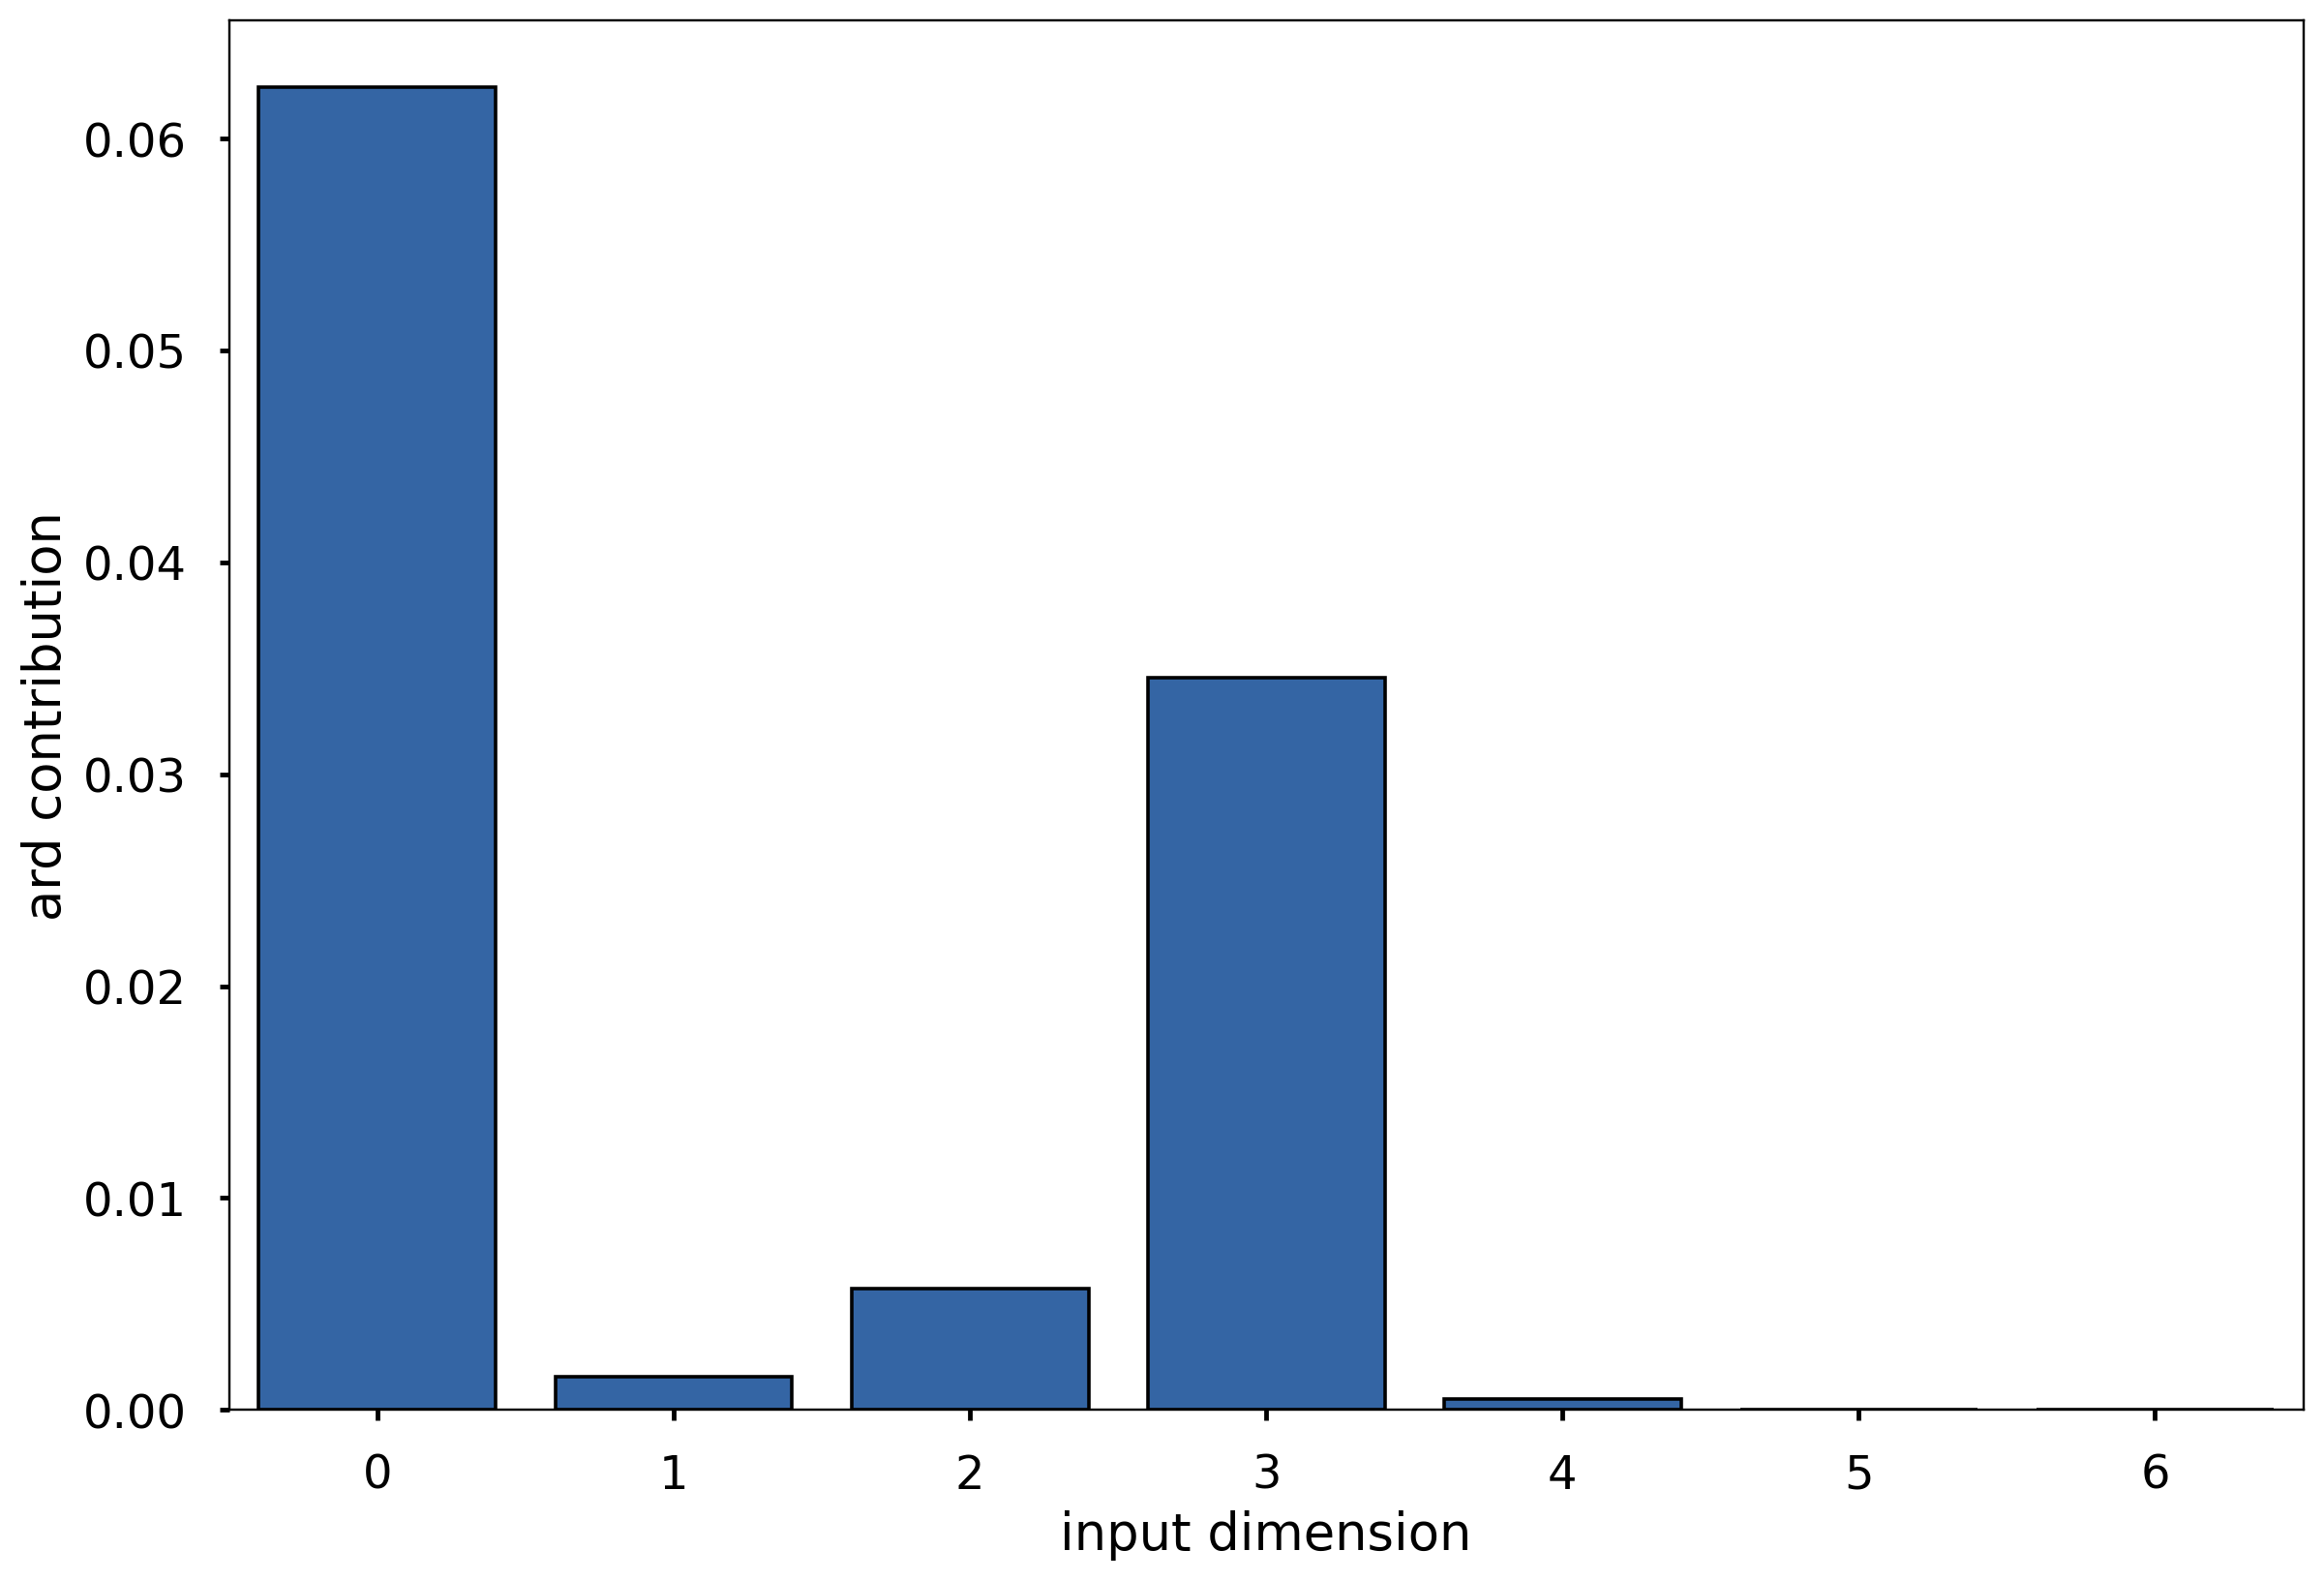

In [17]:
fig, ax = plt.subplots()
m_GPLVM.kern.plot_ARD(ax=ax)

filename = shape_name_string + ' ARD.png'
plt.savefig(filename)
files.download('/content/' + filename)

In [18]:
m_GPLVM.kern.lengthscale #which is the inverse of ARD contribution

bayesian_gplvm.rbf.lengthscale:
Param([  1.55187003,   9.75711499,   5.12119221,   2.0862299 ,
        17.22989645, 257.87003445, 260.78393391])

In [19]:
lengthscales = m_GPLVM.kern.lengthscale.argsort()
input_dimension_1 =lengthscales[0]
input_dimension_2 =lengthscales[1]
input_dimension_3 =lengthscales[2]

print(input_dimension_1)
print(input_dimension_2)
print(input_dimension_3)

0
3
2


In [20]:
latent = m_GPLVM.X.mean

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

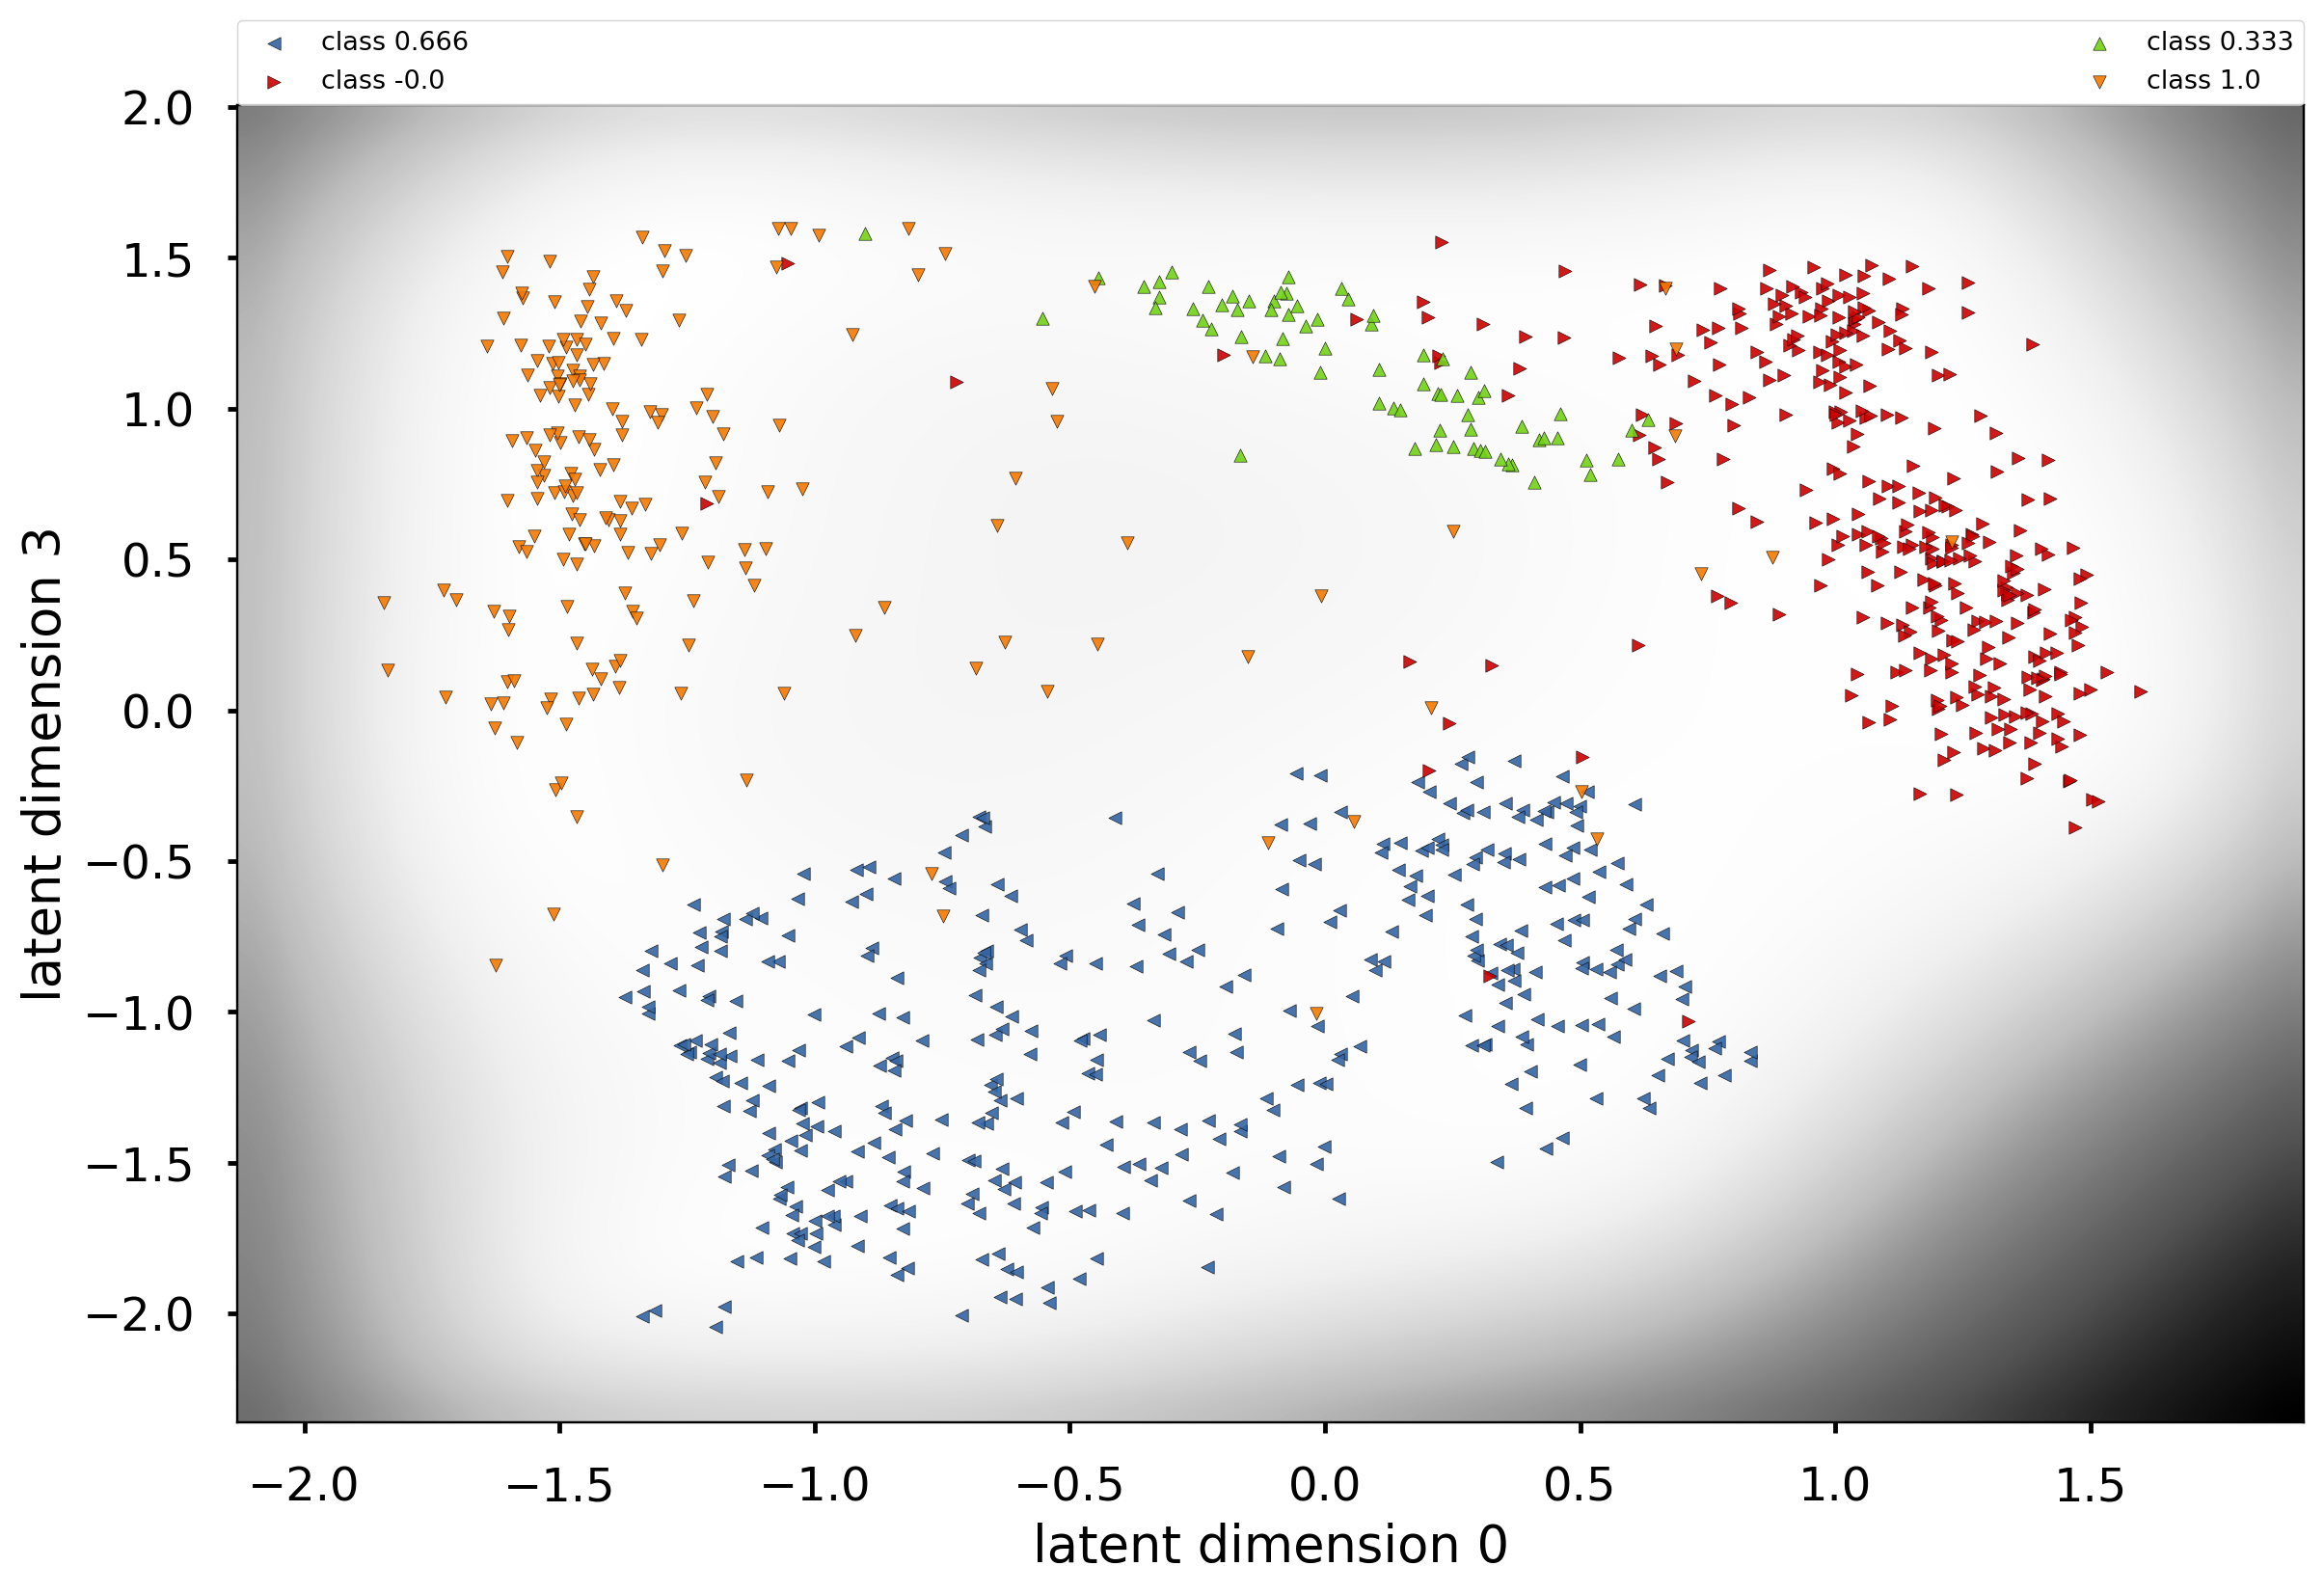

In [21]:
fig, ax = plt.subplots()
#ax.set_title('2D latent space')
m_GPLVM.plot_latent(labels = labels, ax=ax, updates=False, legend =True)
filename = shape_name_string + ' 2D latent.png'
plt.savefig(filename)
files.download('/content/' + filename)

In [22]:
#use this to create an interactive 3D plot, use mouse buttons to translate, rotate and zoom
fig = go.Figure(data=[go.Scatter3d(x=latent[:,input_dimension_1], y=latent[:,input_dimension_2], z=latent[:, input_dimension_3],
                                   mode='markers',
                                   marker=dict(size=3, color = labels, colorscale='Rainbow',opacity=0.8)
                                   )])
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=4
    ),
)
fig.show( )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

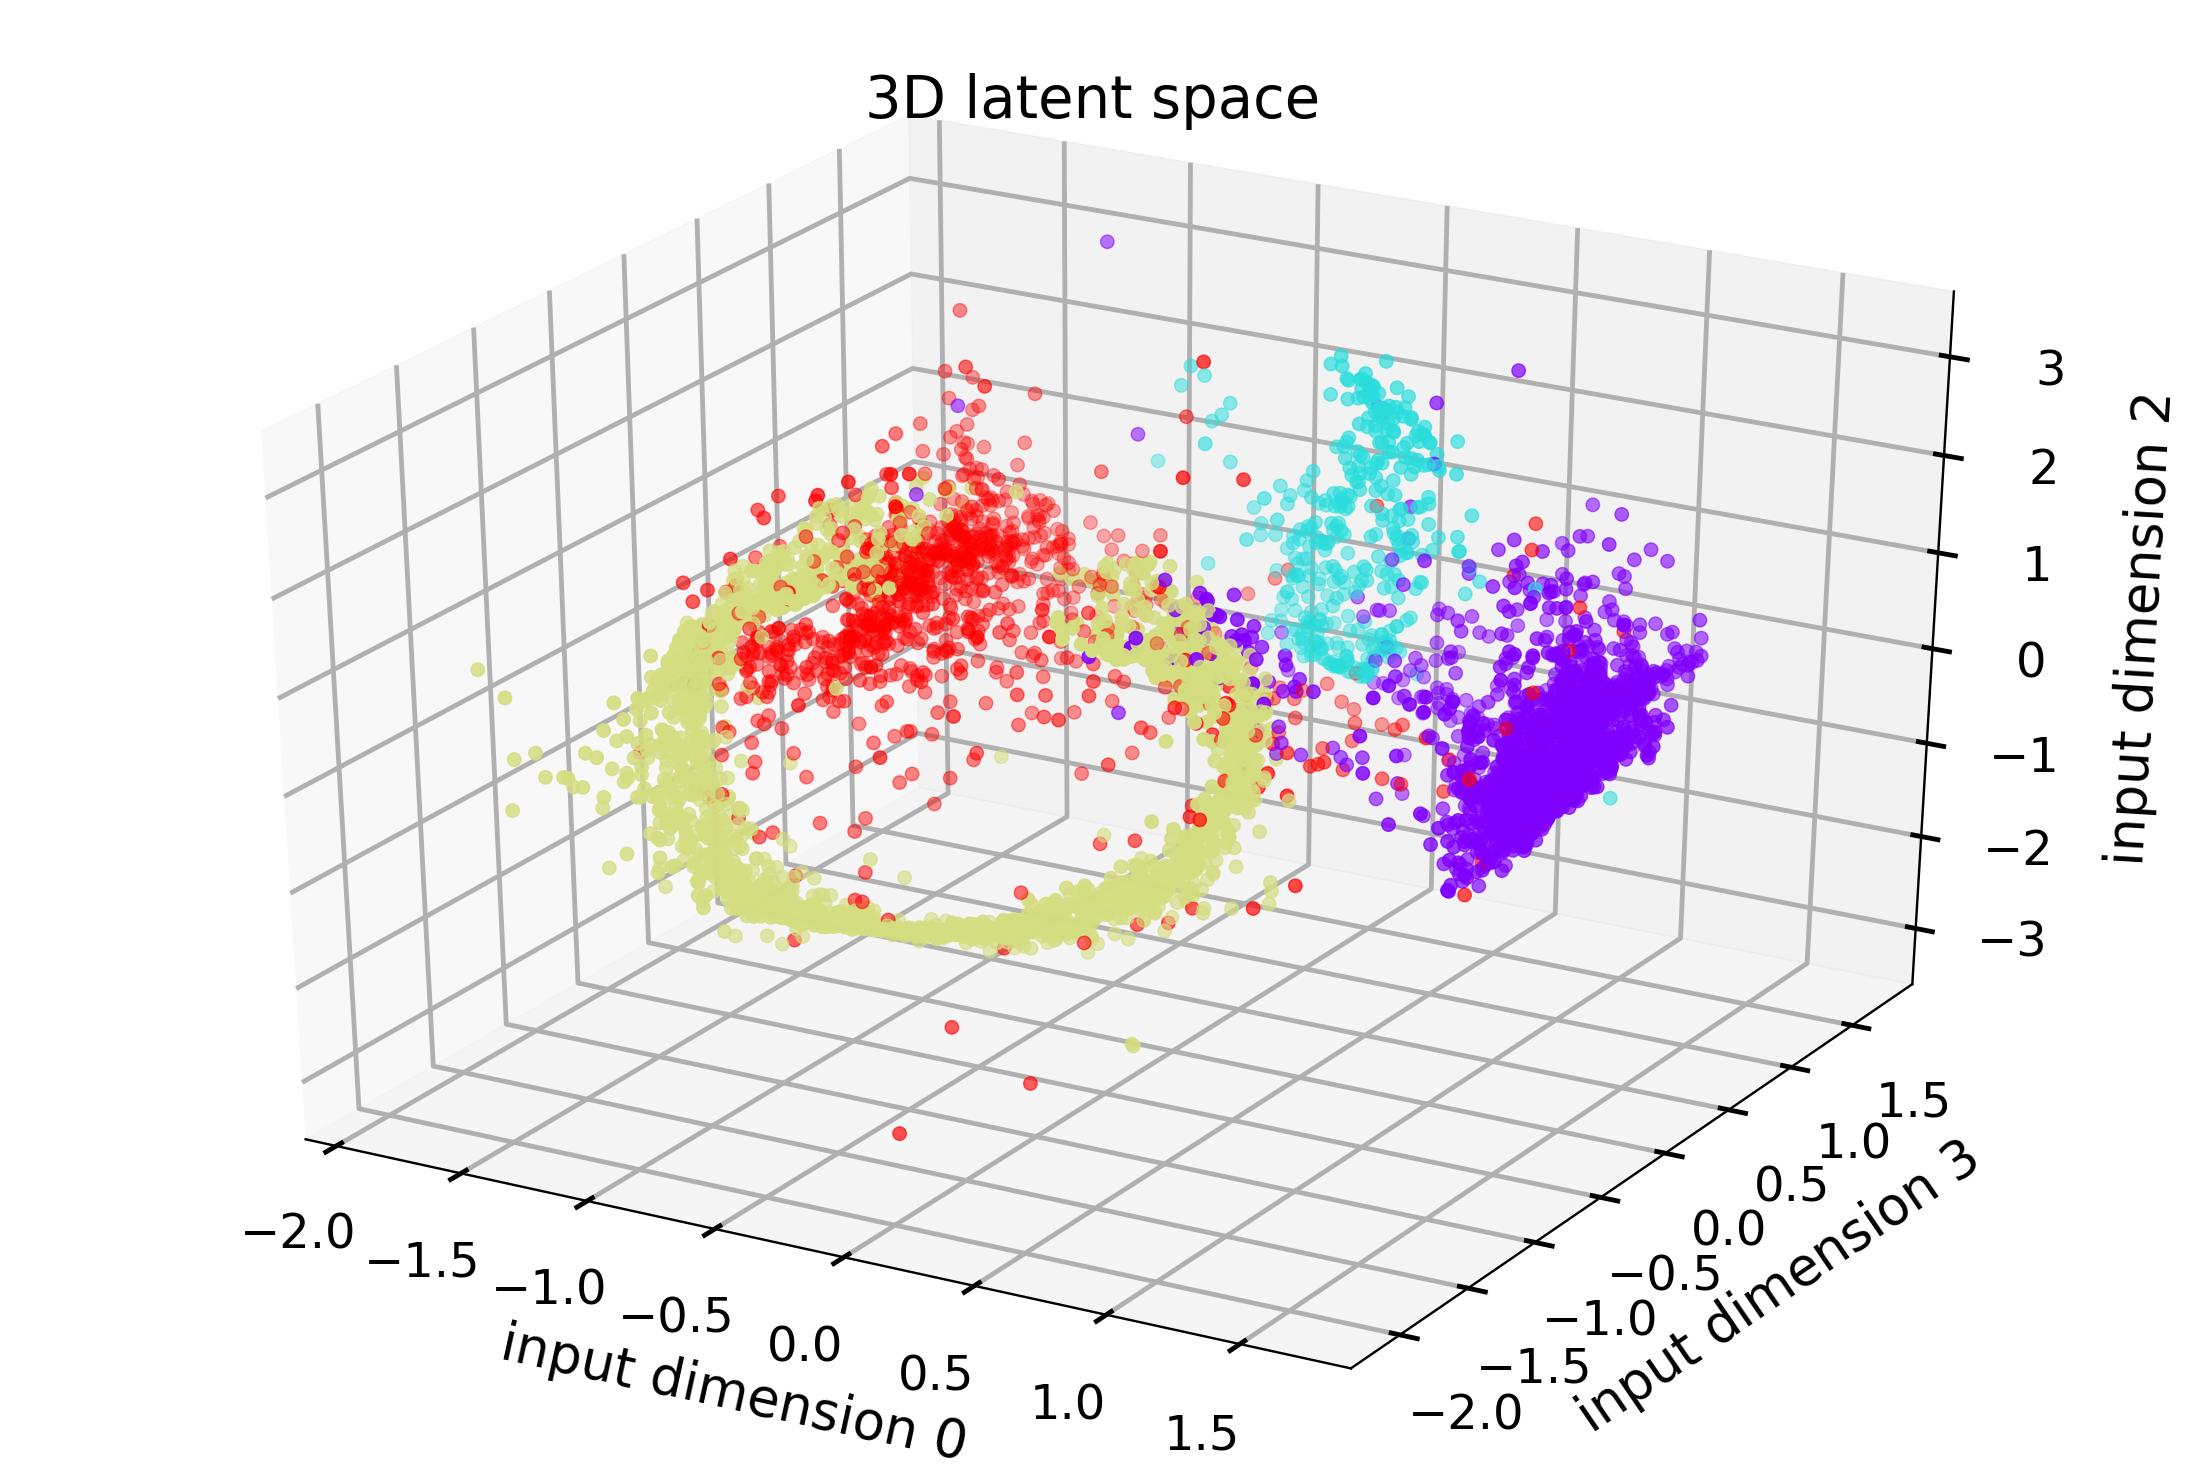

In [23]:
plt.style.use('seaborn-poster')
ax = plt.axes(projection='3d')

ax.scatter3D(latent[:, input_dimension_1], latent[:,input_dimension_2], latent[:, input_dimension_3], c = labels)
ax.set_title('3D latent space')

# Set axes label
ax.set_xlabel('input dimension ' + str(input_dimension_1), labelpad=20)
ax.set_ylabel('input dimension ' + str(input_dimension_2), labelpad=20)
ax.set_zlabel('input dimension ' + str(input_dimension_3), labelpad=20)

filename = shape_name_string + ' 3D latent.png'
plt.savefig(filename)
files.download('/content/' + filename)

plt.show(ax)



#Save/load the model

In [24]:
# 1: Saving a model:
filename = shape_name_string + ' BCGPLVM.npy'
np.save(filename, m_GPLVM.param_array)
files.download('/content/' + filename)
print(m_GPLVM)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Name : bayesian gplvm
Objective : -11937.978375174032
Number of Parameters : 70359
Number of Optimization Parameters : 70359
Updates : True
Parameters:
  bayesian_gplvm.          |                  value  |  constraints  |  priors
  latent_space.mean        |              (5000, 7)  |               |        
  latent_space.variance    |              (5000, 7)  |      +ve      |        
  inducing_inputs          |                (50, 7)  |               |        
  rbf.variance             |     0.1503916922546947  |      +ve      |        
  rbf.lengthscale          |                   (7,)  |      +ve      |        
  Gaussian_noise.variance  |  0.0002450085070396798  |      +ve      |        


In [25]:
# 2: loading a model
# Model creation, without initialization:
m_load = GPy.models.BayesianGPLVM(Y, input_dim, kernel=k_GPLVM, init=init, num_inducing=num_inducing, initialize=False)
m_load.update_model(False) # do not call the underlying expensive algebra on load
m_load.initialize_parameter() # Initialize the parameters (connect the parameters up)
m_load[:] = np.load(filename) # Load the parameters
m_load.update_model(True) # Call the algebra only once
print(m_load)


Name : bayesian gplvm
Objective : -11937.978375174032
Number of Parameters : 70359
Number of Optimization Parameters : 70359
Updates : True
Parameters:
  bayesian_gplvm.          |                  value  |  constraints  |  priors
  latent_space.mean        |              (5000, 7)  |               |        
  latent_space.variance    |              (5000, 7)  |      +ve      |        
  inducing_inputs          |                (50, 7)  |               |        
  rbf.variance             |     0.1503916922546947  |      +ve      |        
  rbf.lengthscale          |                   (7,)  |      +ve      |        
  Gaussian_noise.variance  |  0.0002450085070396798  |      +ve      |        
